In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

sns.set(font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize' :(22, 12)})

In [176]:
df = pd.read_csv('B:\Karpov Courses\Stat\london.csv')

In [177]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [178]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace = True)

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

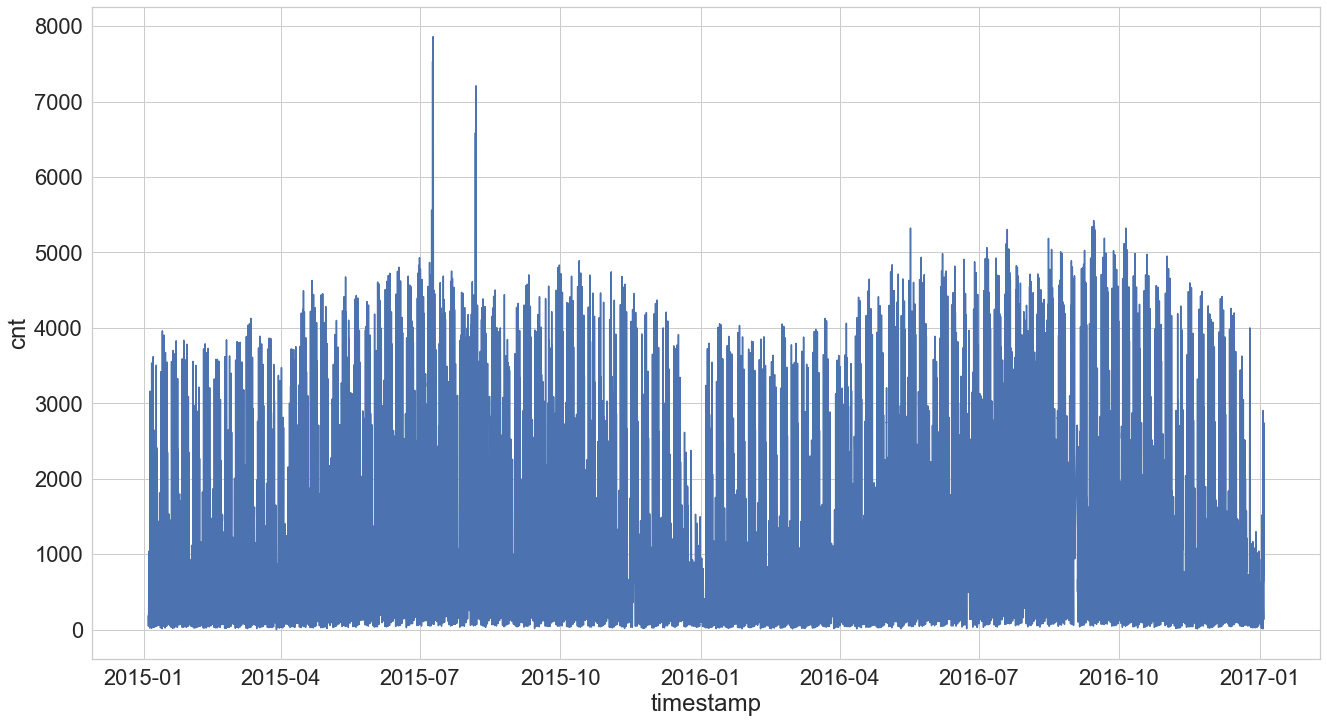

In [179]:
sns.lineplot(x='timestamp', y='cnt', data=df )

In [180]:
resampled = df.resample(rule='D').cnt.sum()

<AxesSubplot:xlabel='timestamp'>

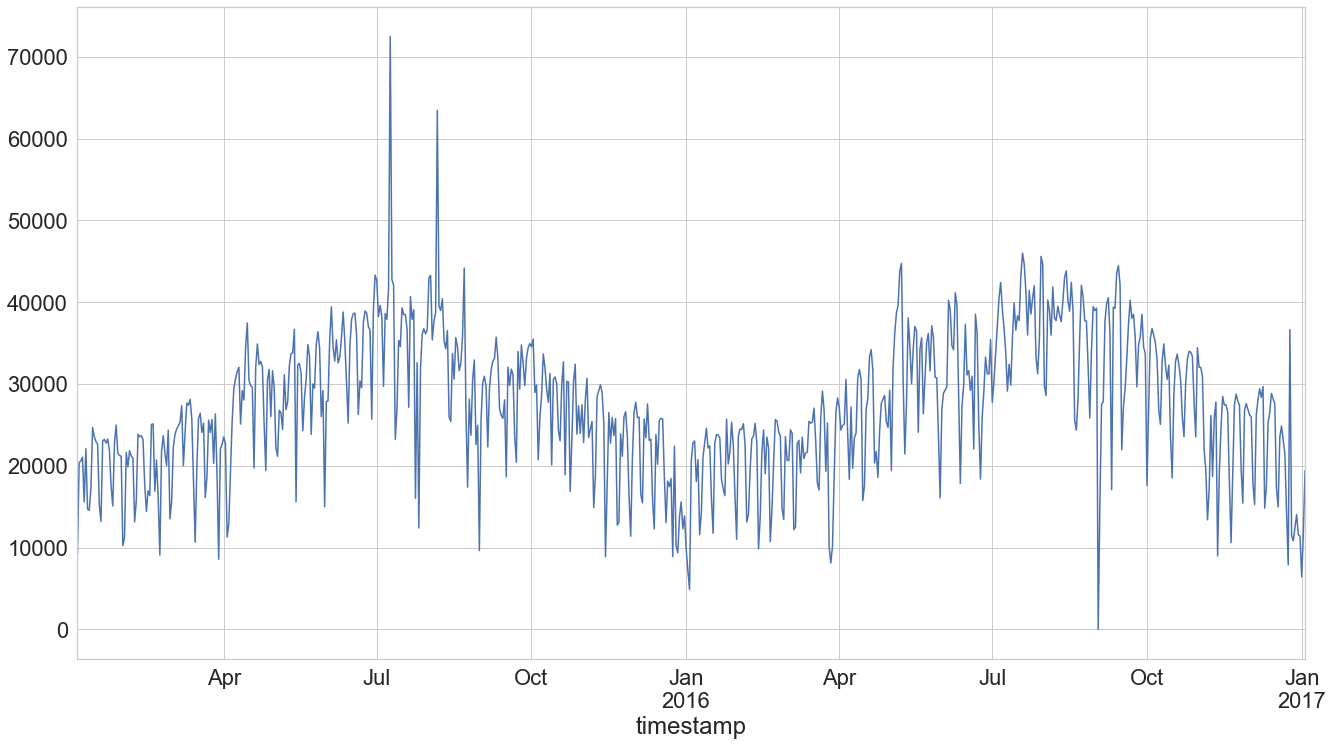

In [181]:
resampled.plot()

In [182]:
resampled_rolling = resampled.rolling(3).mean()


In [183]:
difference = resampled - resampled_rolling

In [184]:
std = np.std(difference)
std 

4558.58664111794

In [185]:
intervals = resampled_rolling.reset_index()
intervals.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


In [186]:
intervals['upper_bound_99'] = intervals.cnt + 2.576*std
intervals['lower_bound_99'] = intervals.cnt - 2.576*std

In [189]:
intervals.head()


,timestamp,cnt,upper_bound_99,lower_bound_99
0,2015-01-04,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN
2,2015-01-06,16739.666667,28482.585854,4996.747479
3,2015-01-07,20683.000000,32425.919188,8940.080812
4,2015-01-08,19092.666667,30835.585854,7349.747479


In [197]:
resampled = resampled.reset_index()

In [198]:
intervals.cnt = resampled.cnt


In [200]:
anomalies = intervals.query('cnt > upper_bound_99')
anomalies

,timestamp,cnt,upper_bound_99,lower_bound_99
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


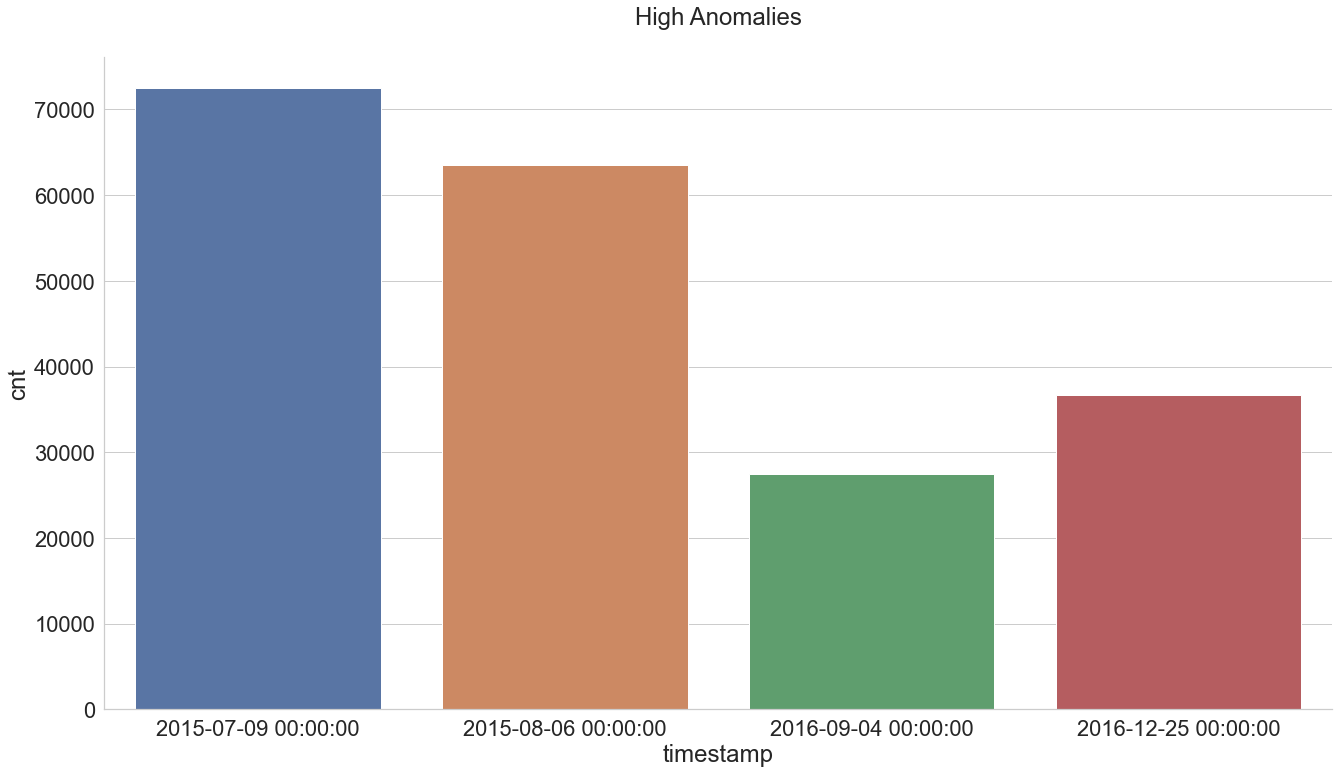

In [214]:
ax = sns.barplot(data = anomalies, x = 'timestamp', y = 'cnt')
ax.set_xticklabels(anomalies.timestamp)
ax.set_title('High Anomalies\n')
sns.despine()

In [213]:
anomalies_low = intervals.query('cnt < lower_bound_99')
anomalies_low

,timestamp,cnt,upper_bound_99,lower_bound_99
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812


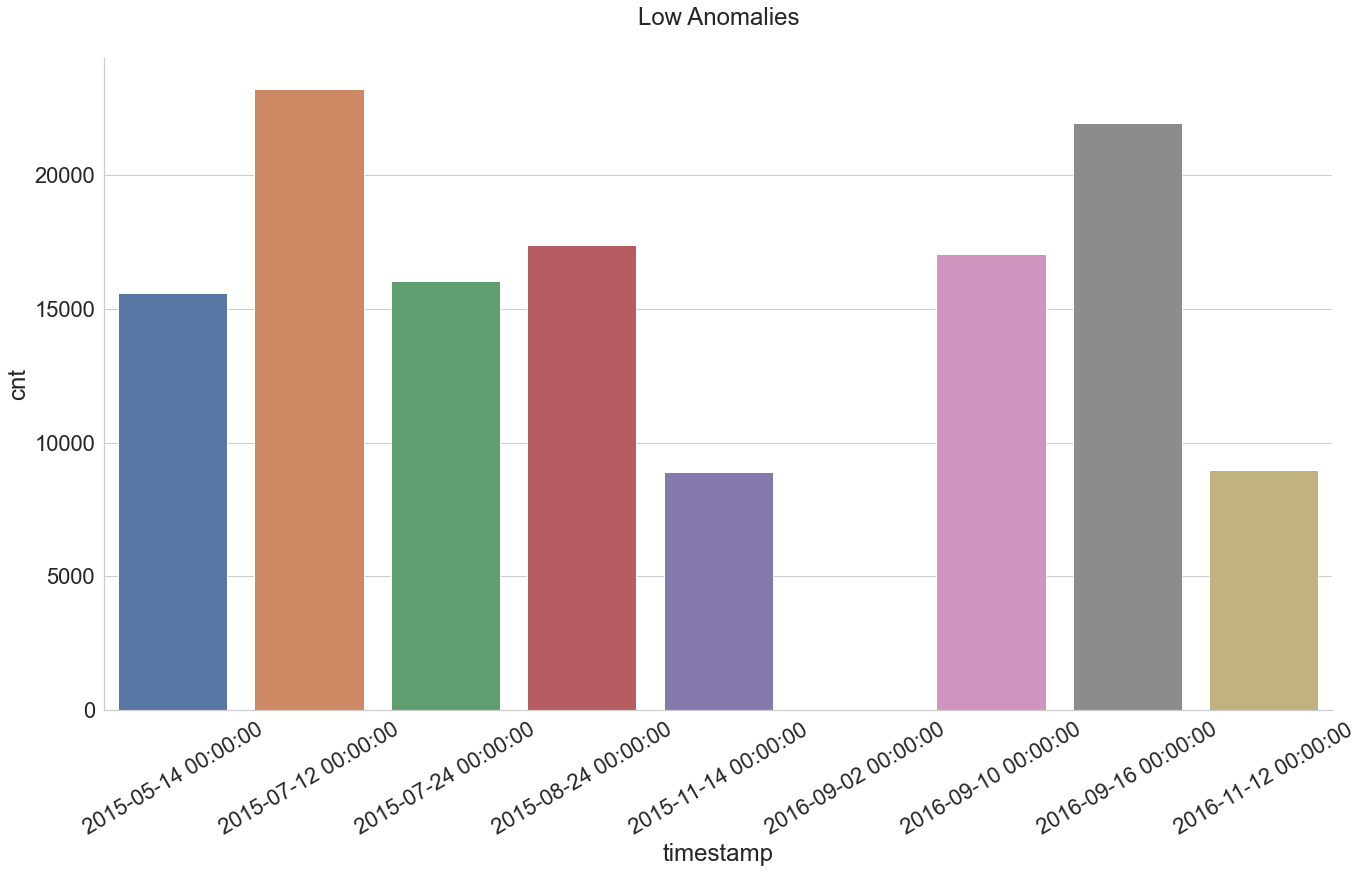

In [217]:
ax = sns.barplot(data = anomalies_low, x = 'timestamp', y = 'cnt')
ax.set_xticklabels(anomalies_low.timestamp, rotation = 30)
ax.set_title('Low Anomalies\n')
sns.despine()